# 05-01 Expected Properties of Random Graphs

*November 16 2022*

In this practice session, we explore the properties of random microstates generated by the random graph models. We start our investigation with the degree distribution, the diameter, and the clustering coefficient:

In [1]:
import numpy as np
import pathpy as pp

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

from tqdm import tqdm

plt.style.use('default')
sns.set_style("whitegrid")

# Degree sequence and distribution

We first compute and fit the distribution of node degrees. We can access the degrees of nodes via the dictionary `network.nodes.degrees`. To calculate degree-based statistics, it is convenient to return a `numpy` array with the degree sequence, which we can do using the `statistics` submodule. This can be used for directed, undirected, weighted, and unweighted networks:

In [2]:
n_undirected = pp.Network(directed=False)
n_undirected.add_edge('a', 'b', weight=2.0)
n_undirected.add_edge('b', 'c', weight=1.0)
n_undirected.add_edge('c', 'a', weight=7.0)
n_undirected.add_edge('d', 'e', weight=1.0)
n_undirected.add_edge('e', 'f', weight=2.0)
n_undirected.add_edge('f', 'g', weight=2.0)
n_undirected.add_edge('g', 'd', weight=4.0)
n_undirected.add_edge('d', 'f', weight=2.0)
n_undirected.add_edge('b', 'd', weight=1.0)

print(pp.statistics.degree_sequence(n_undirected))
print(pp.statistics.degree_sequence(n_undirected, weight=True))

[2. 3. 2. 4. 2. 3. 2.]
[9. 4. 8. 8. 3. 6. 6.]


The entries in the degree sequence array are given in the same order as in the `index` attribute of the `nodes` set. We can use this to resolve entries in the ordered array to elements in the unordered node set:

In [3]:
degrees = pp.statistics.degree_sequence(n_undirected)
for v in n_undirected.nodes.uids:
    print(v, degrees[n_undirected.nodes.index[v]])

b 3.0
d 4.0
g 2.0
e 2.0
c 2.0
f 3.0
a 2.0


To compute the degree distribution, we can use the `degree_distribution` function in `pathpy.statistics`. It returns a dictionary where the keys are node degrees, and the values are the relative frequencies of those degrees. For our example network we obtain:

In [4]:
pp.statistics.degree_distribution(n_undirected)

defaultdict(float,
            {3: 0.2857142857142857,
             4: 0.14285714285714285,
             2: 0.5714285714285714})

To calculate mean and variance of the degree sequence, we can use the standard `numpy` functions:

In [5]:
print('Mean degree = ', np.mean(pp.statistics.degree_sequence(n_undirected)))
print('Degree var. = ', np.var(pp.statistics.degree_sequence(n_undirected)))

Mean degree =  2.5714285714285716
Degree var. =  0.5306122448979592


We can use the degree sequence to plot the distribution of degrees, e.g. using the `seaborn` function `distplot`. By default, this will plot a (normalized) histogramm of node degrees (bars) along with a kernel density estimate for the probability mass function (blue line). In the following, we use the `degree_sequence` function that is included as a member of the `Network` class:

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


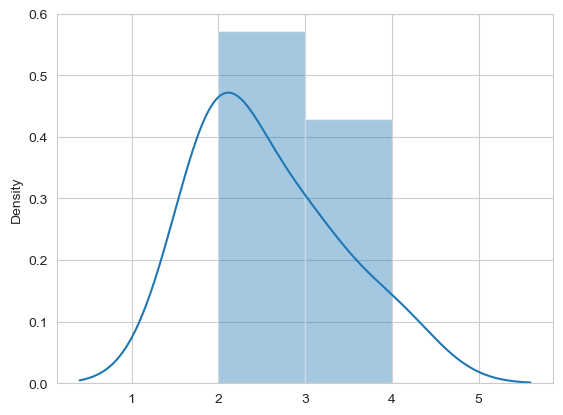

In [6]:
sns.distplot(n_undirected.degree_sequence());

If we prefer a simple, unnormalized histogram we can use the matplotlib function `hist` or we can call the new seaborn function `displot`.

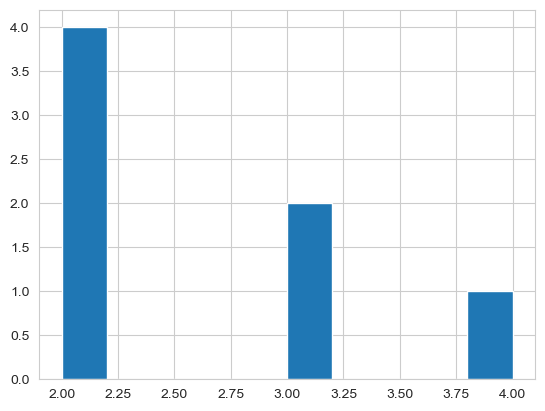

In [7]:
plt.hist(n_undirected.degree_sequence());

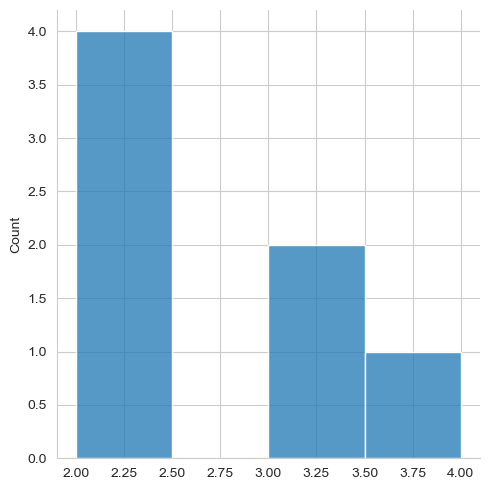

In [8]:
sns.displot(n_undirected.degree_sequence());

# Degree distribution of random graphs

How are the degrees in a random network distributed? To explore this, we create random networks with a fixed number of $n=1000$ nodes and a variable number of edges. We generate those networks with the $G(n,p)$ model. For each node, in the $G(n,p)$ model $n$ Bernoulli trials are performed, each trial succeeding with probability $p$. This implies that the expected number of successful trials (and thus links to other nodes) is $n \cdot p$. Thus, setting the model parameter $p=\frac{k}{n}$ ensures that the expected node degree in the generated networks is $n\cdot p = n \cdot \frac{k}{n} = k$. We start with random networks with an expected degree of $k=2$.

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 50.0)]

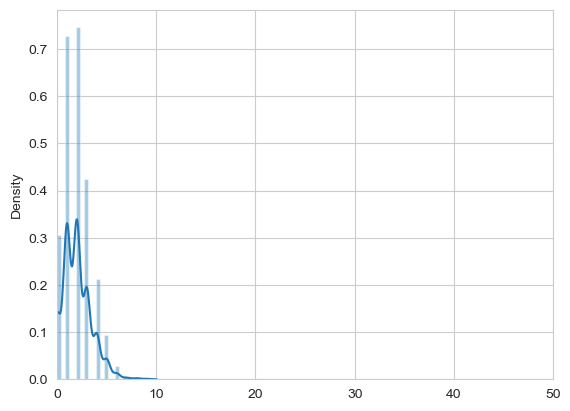

In [9]:
n_2 = pp.generators.random_graphs.ER_np(1000, 2/1000)
ax = sns.distplot(n_2.degree_sequence())
ax.set(xlim=(0, 50))

We get a relatively narrow distribution around the expected degree of two, with a maximum smaller than ten. Let us increase the expected degree to five:

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 50.0)]

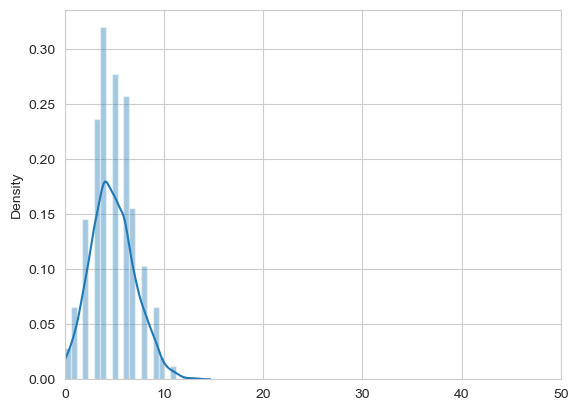

In [10]:
n_5 = pp.generators.random_graphs.ER_np(1000, 5/1000)
ax = sns.distplot(n_5.degree_sequence())
ax.set(xlim=(0, 50))

The distribution necessarily shifts to the right because the mean of the distribution increases. The distribution also gets wider, i.e. the variance increases. Let us increase this to 20:

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 50.0)]

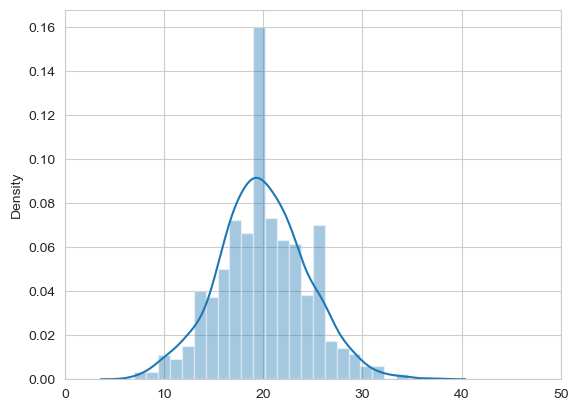

In [11]:
n_20 = pp.generators.random_graphs.ER_np(1000, 20/1000)
ax = sns.distplot(n_20.degree_sequence())
ax.set(xlim=(0, 50))

We find that the degree distribution assumes a Bell shape much like that of the Normal distribution. Let us increase the mean degree to 30 and plot a Normal distribution along the empirical distribution:

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


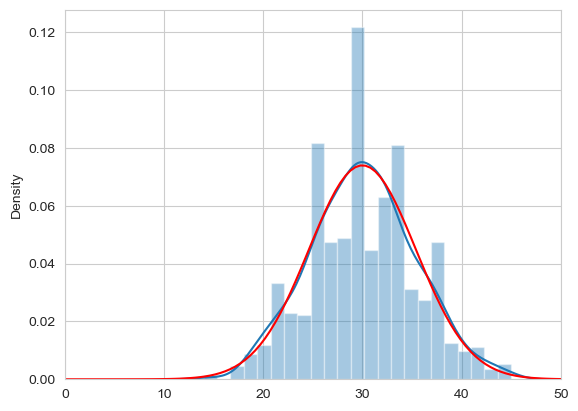

In [12]:
n_50 = pp.generators.random_graphs.ER_np(1000, 30/1000)
ax = sns.distplot(n_50.degree_sequence())
ax.set(xlim=(0, 50))

x = np.linspace(0, 50, 100)
ax.plot(x, scipy.stats.norm.pdf(x, 30, np.sqrt(30*(1-30/1000))), color='red')

For the plotted theoretical Normal distribution (red) we have adjusted the mean and the variance to the model parameters. In lecture L05 we will explain why the distribution has exactly this shape and under which conditions we can approximate the degree distribution of a random graph by a Normal distribution.

# Empirical vs. random networks

We now study the degree distribution of random graphs and compare them to the degree distributions of empirical networks. For this, we first load the three empirical networks that we used in a previous practice session:

In [14]:
n_gentoo = pp.io.sql.read_network('../data/networks.db', sql='SELECT source, target FROM gentoo', directed=False)
n_highschool = pp.io.sql.read_network('../data/networks.db', sql='SELECT source, target FROM highschool', directed=False)
n_physicians = pp.io.sql.read_network('../data/networks.db', sql='SELECT source, target FROM physicians', directed=False)

[11-09 14:06:54: WARNING] 154 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.
[11-09 14:06:54: WARNING] 175 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.


For each network, we first plot the empirical degree distribution.

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


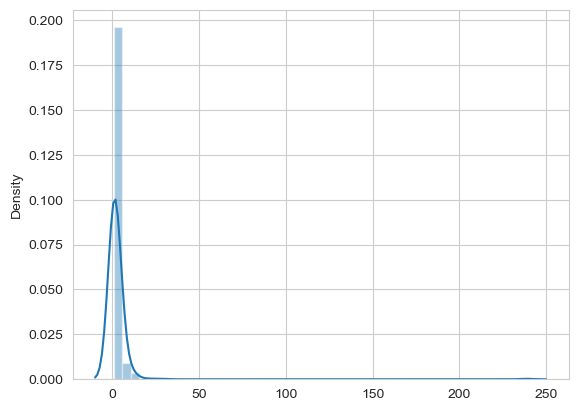

In [15]:
sns.distplot(n_gentoo.degree_sequence());

We then use the `ER_nm_randomize` function to generate a random microstate where the model parameters of the underlying $G(n,m)$ model have been adjusted to the number of nodes and links in the empirical network:

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


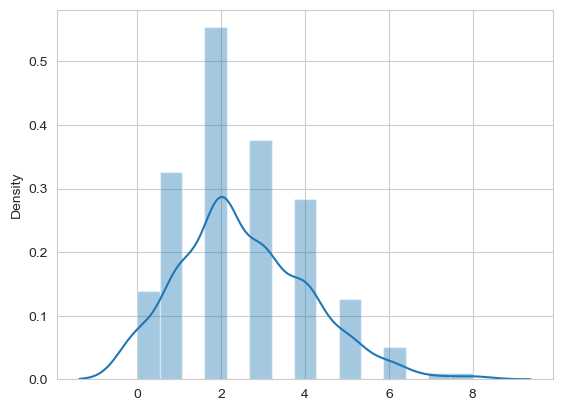

In [16]:
r_gentoo = pp.generators.random_graphs.ER_nm_randomize(n_gentoo)
sns.distplot(r_gentoo.degree_sequence());

Again, we find that the degree distribution of the random network is much more narrow than that of the empirical network. In other words: Compared to a simple random graph model this broad degree distribution actually constitutes an interesting pattern that we seek to model and explain. We repeat the same experiment with the highschool contact network:

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


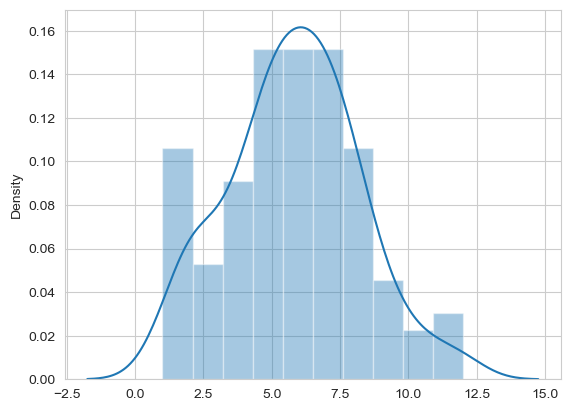

In [17]:
sns.distplot(n_highschool.degree_sequence());

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


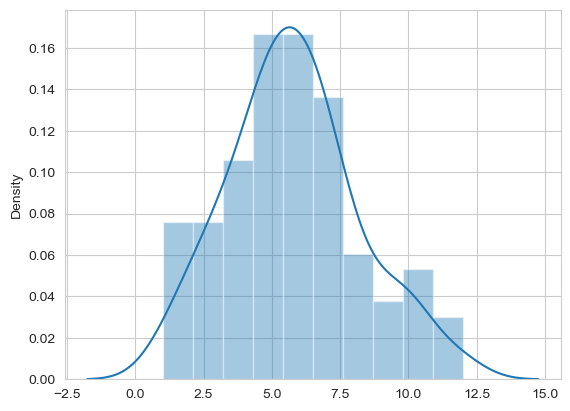

In [18]:
r_highschool = pp.generators.random_graphs.ER_nm_randomize(n_highschool)
sns.distplot(r_highschool.degree_sequence());

Here the empirical degree distribution resembles the degree distribution of a random graph more closely. What about the physicians network?

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


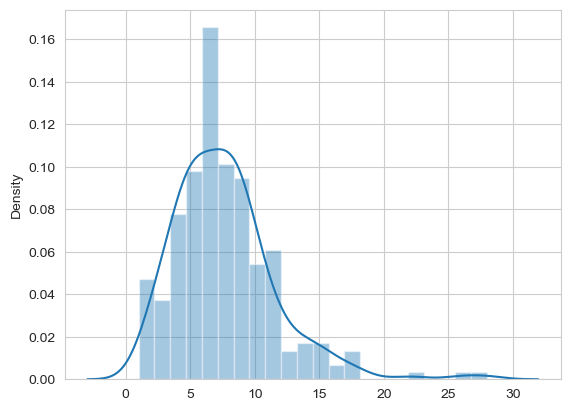

In [19]:
sns.distplot(n_physicians.degree_sequence());

/Users/ingo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


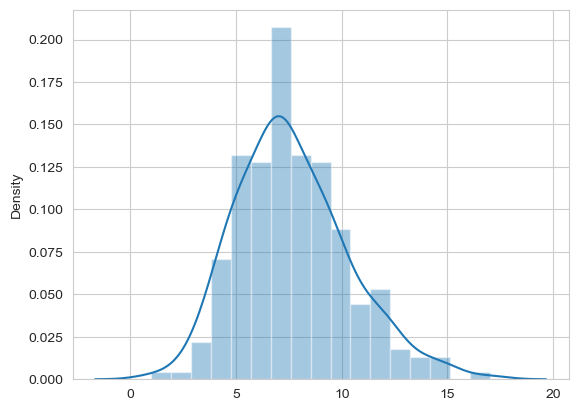

In [20]:
r_physicians = pp.generators.random_graphs.ER_nm_randomize(n_physicians)
sns.distplot(r_physicians.degree_sequence());

Again, the degree distribution of the random graph is close but not identical to the empirical degree distribution.

# Diameter and clustering coefficient of random vs. empirical networks

We conclude this session by looking at diameter, average shortest path length, and clustering coefficient of empirical networks as well as their randomized counterparts. We start with the gentoo collaboration network:

In [21]:
print('Diameter = ', n_gentoo.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(n_gentoo))
print('Clustering coefficient = ', n_gentoo.avg_clustering_coefficient())

Diameter =  8.0
Avg path length =  3.1096379146451367
Clustering coefficient =  0.017357355654577637


In [22]:
print('Diameter = ', r_gentoo.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(r_gentoo))
print('Clustering coefficient = ', r_gentoo.avg_clustering_coefficient())

Diameter =  inf
Avg path length =  inf
Clustering coefficient =  0.007450076804915514


We find that (i) the clustering coefficient of the random realization is much smaller than in the empirical network, and (ii) the random realization is not connected, which leads to an infinite diameter and average shortest path length. To still allow for an approximate comparison, we can compute the largest connected component of the random realization and repeat the calculation:

In [23]:
r_gentoo_lcc = r_gentoo.largest_connected_component()

print('Diameter = ', r_gentoo_lcc.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(r_gentoo_lcc))
print('Clustering coefficient = ', r_gentoo_lcc.avg_clustering_coefficient())

Diameter =  15.0
Avg path length =  6.232805199153768
Clustering coefficient =  0.008271021907385543


We find that both the diameter and the average shortest path length of the largest connected component of the random realization is much larger than that of the empirical network. To further substantiate that diameter and shortest path lengths are indeed significantly smaller than expected at random, we need an analytical way to calculate this property, which we will address next week. We conclude by repeating this analysis for the highschool and physicians network:

In [24]:
print('Diameter = ', n_highschool.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(n_highschool))
print('Clustering coefficient = ', n_highschool.avg_clustering_coefficient())

Diameter =  12.0
Avg path length =  5.362745098039215
Clustering coefficient =  0.4467995430495431


In [28]:
r_highschool_lcc = r_highschool.largest_connected_component()

print('Diameter = ', r_highschool_lcc.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(r_highschool_lcc))
print('Clustering coefficient = ', r_highschool_lcc.avg_clustering_coefficient())

Diameter =  5.0
Avg path length =  2.8978991596638655
Clustering coefficient =  0.056756253006253


Interestingly, the diameter and average path lengths of the random realization are smaller than that of the empirical network, i.e. we find the opposite case compared to the gentoo network. The clustering coefficient of a random network is much smaller.

In [25]:
print('Diameter = ', n_physicians.diameter())
print('Avg path length = ', pp.algorithms.avg_path_length(n_physicians))
print('Clustering coefficient = ', n_physicians.avg_clustering_coefficient())

Diameter =  inf
Avg path length =  inf
Clustering coefficient =  0.3115751356464073


For the physicians network we find that the empirical network is not connected, i.e. the calculation of the diameter and the average shortest path length does not make sense here.

To further substantiate the finding that, e.g. for the `highschool` network the clustering coefficient is significantly larger than what we would expect at random, we can generate a distribution of clustering coefficients by calculating it in a number of microstates. We can then check who the observed clustering coefficient compares to that distribution:

In [26]:
ccs = []
n = n_highschool.number_of_nodes()
m = n_highschool.number_of_edges()
for i in tqdm(range(20), desc='generating random graphs'):
    r = pp.generators.ER_nm(n, m)
    ccs.append(r.avg_clustering_coefficient())

generating random graphs: 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]


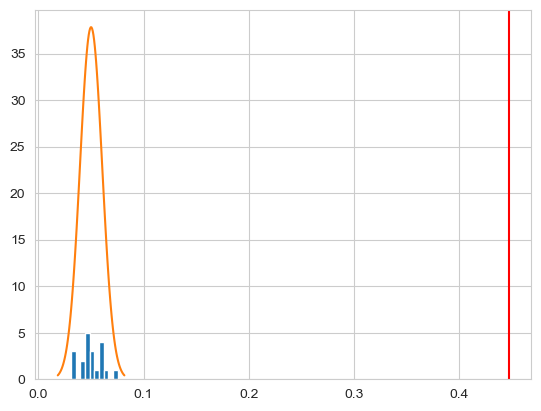

Average clustering coefficient = 0.05018469493469493
Std of clustering coefficient = 0.010544140394010559


In [27]:
mean = np.mean(ccs)
std = np.std(ccs)
plt.hist(ccs)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std))
plt.axvline(x=n_highschool.avg_clustering_coefficient(), c='r')
plt.show()
print('Average clustering coefficient =', mean)
print('Std of clustering coefficient =', std)

The red vertical bar is the observed clustering coefficient and the curve on the left is a Gaussian fit to the distribution of coefficients of random realizations. This can be seen as a simple form of hypothesis testing, which can give us confidence that the large clustering coefficient is indeed a pattern in this network that can not explained by random effects.